<p style="text-align:center;">
<img src="https://github.com/Itsrummmy/From_Pixels_to_Profit/blob/main/Images/header.jpg?raw=true"/>
</p>
<div style="text-align: center;">
    <h1>TMDB Data Wrangling Project</h1>


# Project Objective: Uncovering Insights in the TMDB Dataset

## By *Ranmi Ajayi*

## Data Extraction & Cleaning

### Importing necessary Libraries and Modules

Saving & sampling original dataset to get an idea of what it looks like

In [23]:
# importing relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
import ast

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/Itsrummmy/From_Pixels_to_Profit/refs/heads/main/tmdb_movies.csv")

### Checking for column names, nulls and data inconsistencies

In [26]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [27]:
df_original = df.copy()   #saving a copy of the original file before cleaning

#sampling dataset
df.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2247,26500000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,128,"[{""id"": 1721, ""name"": ""fight""}, {""id"": 1994, ""...",ja,もののけ姫,"Ashitaka, a prince of the disappearing Ainu tr...",60.732738,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-07-12,159375308,134.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,The Fate Of The World Rests On The Courage Of ...,Princess Mononoke,8.2,1983
2828,12000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 80, ""nam...",NaN,57214,"[{""id"": 2016, ""name"": ""vandalism""}, {""id"": 627...",en,Project X,Three high school seniors throw a party to mak...,49.070321,"[{""name"": ""Silver Pictures"", ""id"": 1885}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-01,100000000,88.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness it,Project X,6.5,1564
3094,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,10071,"[{""id"": 380, ""name"": ""brother brother relation...",en,The Brothers Solomon,"A pair of well-meaning, but socially inept bro...",8.312153,"[{""name"": ""Revolution Studios"", ""id"": 497}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-09-07,0,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They want to put a baby in you.,The Brothers Solomon,4.9,46
445,80000000,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",http://www.justgowithit-movie.com,50546,"[{""id"": 966, ""name"": ""beach""}, {""id"": 1907, ""n...",en,Just Go with It,"A plastic surgeon, romancing a much younger sc...",37.026650,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-02-10,214918407,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sometimes a guy's best wingman... is a wingwoman,Just Go with It,6.3,1543
827,55000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 14, ""name...",NaN,795,"[{""id"": 236, ""name"": ""suicide""}, {""id"": 290, ""...",en,City of Angels,When guardian angel Seth -- who invisibly watc...,21.272734,"[{""name"": ""Atlas Entertainment"", ""id"": 507}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-04-10,198685114,114.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,She didn't believe in angels until she fell in...,City of Angels,6.4,529


In [28]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### Fixing Null values

> Looking at the dataset:
- homepage' appears to have too many null values and isn't particularly essential for data-driven insights. Therefore, the homepage column has been dropped
- overview has 3 null values and 'no overview available' added in its place
- release_data has 1 and was dropped due to inconsistent information online
- runtime has 2 nulls which have both been filled
- tagline has 844 nulls and 'NA' added in its place

In [31]:
#where homepage is null
try:
    df = df.drop(columns=['homepage'])
except:
    print('Column has already been dropped')

In [32]:
df.loc[df.overview.isnull()][['original_title','budget', 'release_date', 'revenue', 'status', 'overview']]

,original_title,budget,release_date,revenue,status,overview
2656,Chiamatemi Francesco - Il Papa della gente,15000000,2015-12-03,0,Released,NaN
4140,"To Be Frank, Sinatra at 100",2,2015-12-12,0,Released,NaN
4431,Food Chains,913000,2014-04-26,0,Released,NaN


In [33]:
df.shape #Let's take a closer look at the structure of our dataset.

(4803, 19)

In [34]:
#where overview is null
df.overview = df.overview.fillna(value='No overview available')

In [35]:
df.isnull().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  0
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
title                     0
vote_average              0
vote_count                0
dtype: int64

In [36]:
#where release date is null
df.loc[df.release_date.isnull()][['original_title','budget', 'release_date', 'revenue', 'status', 'runtime']]

,original_title,budget,release_date,revenue,status,runtime
4553,America Is Still the Place,0,NaN,0,Released,0.0


We notice that 'America is Still the Place' is the only film missing a release date. While we could attempt to find this information online, the inconsistent and unreliable data available for this film, including its runtime and budget, suggests that it's best to exclude this row from further analysis.

In [38]:
df = df.dropna(subset=['release_date'], how="all")

In [39]:
#where runtime is null
df.loc[df.runtime.isnull()][['original_title','budget', 'release_date', 'revenue', 'status', 'runtime']]

,original_title,budget,release_date,revenue,status,runtime
2656,Chiamatemi Francesco - Il Papa della gente,15000000,2015-12-03,0,Released,NaN
4140,"To Be Frank, Sinatra at 100",2,2015-12-12,0,Released,NaN


The runtime for these movies can both be found online using IMDB:

[To Be Frank, Sinatra at 100](https://www.imdb.com/title/tt4704314/),
[Chiamatemi Francesco - Il Papa della gente](https://www.imdb.com/title/tt3856124/)

In [41]:
df.loc[2656, 'runtime'] = 98
df.loc[4140, 'runtime'] = 81

In [42]:
#where tagline is null
df.loc[df.tagline.isnull()][['original_title','budget', 'release_date', 'revenue', 'status', 'runtime', 'tagline']]

,original_title,budget,release_date,revenue,status,runtime,tagline
10,Superman Returns,270000000,2006-06-28,391081192,Released,154.0,NaN
56,Star Trek Beyond,185000000,2016-07-07,343471816,Released,122.0,NaN
66,Up,175000000,2009-05-13,735099082,Released,96.0,NaN
78,The Jungle Book,175000000,2016-04-07,966550600,Released,106.0,NaN
128,Angels & Demons,150000000,2009-05-13,356613439,Released,138.0,NaN
...,...,...,...,...,...,...,...
4790,دایره,0,2000-09-08,0,Released,90.0,NaN
4794,Sanctuary: Quite a Conundrum,0,2012-01-20,0,Released,82.0,NaN
4797,Cavite,0,2005-03-12,0,Released,80.0,NaN
4800,"Signed, Sealed, Delivered",0,2013-10-13,0,Released,120.0,NaN


In [43]:
df.tagline = df.tagline.fillna(value='NA')

All null values fixed!

<img src="https://images.unsplash.com/photo-1601229752948-14c025e3e13d?q=80&w=2574&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width="600" height="450" />

### Data Consistency

In [47]:
#changing dates to datetime
df.release_date = pd.to_datetime(df.release_date, format='mixed')
df.dtypes

budget                           int64
genres                          object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [48]:
#checking for unique ids
len(df['id'].unique())

4802

In [49]:
#preprocessing the dataset to make it easier to analyse

def extract_genres(x):
    ''' Function to extract genres for each datapoint. '''
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres

    # Iterate through each dictionary
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary

    # Return the Genres
    return Genres

## Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)
df.extracted_genres.sample(2)

2912    [Adventure, Action, Science Fiction]
4341                                [Horror]
Name: extracted_genres, dtype: object

In [50]:
df['extracted_keywords'] = df['keywords'].apply(extract_genres)  #using the extracted_genres definition
df.extracted_keywords.head(2)

0    [culture clash, future, space war, space colon...
1    [ocean, drug abuse, exotic island, east india ...
Name: extracted_keywords, dtype: object

In [51]:
df['prod_company'] = df['production_companies'].apply(extract_genres)
df.prod_company.head(2)

0    [Ingenious Film Partners, Twentieth Century Fo...
1    [Walt Disney Pictures, Jerry Bruckheimer Films...
Name: prod_company, dtype: object

In [52]:
#production_countries
df['prod_countries'] = df['production_countries'].apply(extract_genres)
df['prod_countries'].head()

0    [United States of America, United Kingdom]
1                    [United States of America]
2    [United Kingdom, United States of America]
3                    [United States of America]
4                    [United States of America]
Name: prod_countries, dtype: object

In [53]:
#spoken_languages
df['spoken_languagesx'] = df['spoken_languages'].apply(extract_genres)
df['spoken_languagesx'].head()

0                                 [English, Español]
1                                          [English]
2    [Français, English, Español, Italiano, Deutsch]
3                                          [English]
4                                          [English]
Name: spoken_languagesx, dtype: object

In [54]:
#reshuffling the order of columns for easier analysis

df = df[['id', 'title', 'extracted_genres', 'budget', 'revenue', 'original_language',\
        'original_title', 'popularity', 'release_date', 'runtime','spoken_languagesx', 'status',\
        'tagline', 'vote_average', 'vote_count', 'extracted_keywords', 'prod_company', 'prod_countries', 'overview']]

In [55]:
#lastly, checking the shape one last time to ensure for consistency

df.shape

(4802, 19)

Now we are ready to analyse the dataset!

## **Analysis**

### Top Performing Genres

In [59]:
dfg = df.explode('extracted_genres')

Let's explore by revenue

**BY REVENUE**

In [62]:
sorted_rev = dfg.groupby('extracted_genres')[['revenue']].mean().sort_values(by = 'revenue', ascending=False).head(10).reset_index()

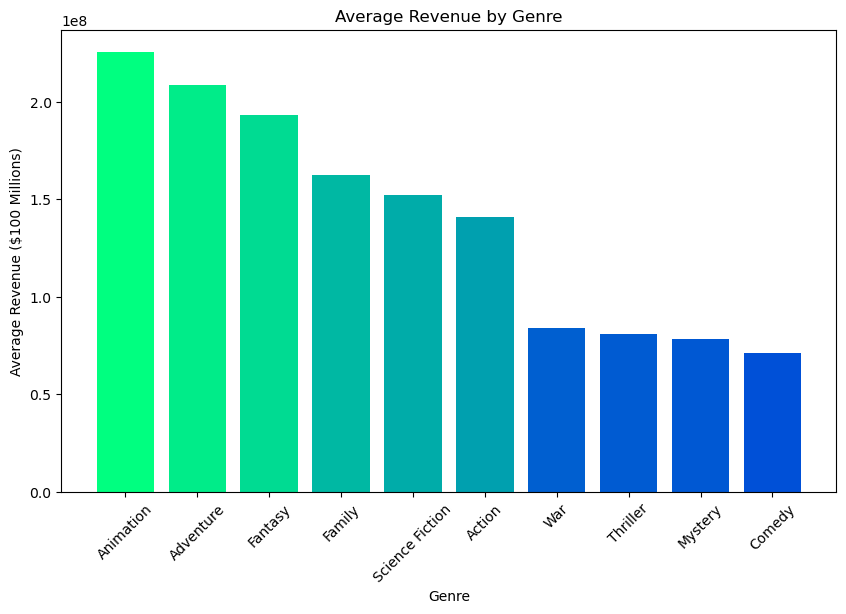

In [273]:
cmap = cm.winter
normalized_revenue = sorted_rev['revenue'] / sorted_rev['revenue'].max()
plt.figure(figsize=(10, 6))
plt.bar(sorted_rev['extracted_genres'], sorted_rev['revenue'], color=cmap(normalized_revenue))
plt.xlabel('Genre')
plt.ylabel('Average Revenue ($100 Millions)')
plt.title('Average Revenue by Genre')
plt.xticks(rotation=45)
plt.show() 

**BY POPULARITY**

In [65]:
sorted_pop = dfg.groupby('extracted_genres')[['popularity']].mean().sort_values(by = 'popularity', ascending=False).head(10).reset_index()

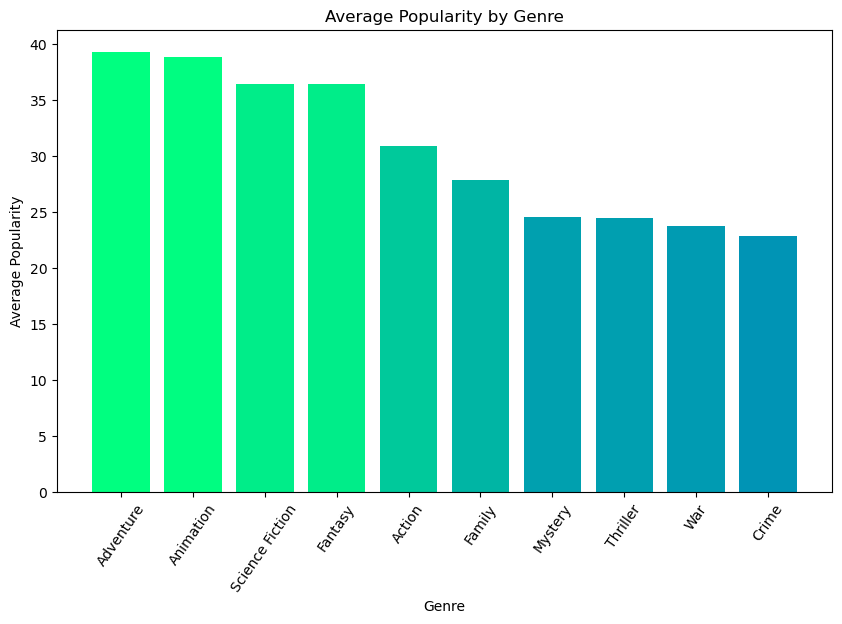

In [275]:
normalized_popularity = sorted_pop['popularity'] / sorted_pop['popularity'].max()
plt.figure(figsize=(10, 6))
plt.bar(sorted_pop['extracted_genres'], sorted_pop['popularity'], color=cmap(normalized_popularity)) 
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.xticks(rotation=55)
plt.savefig('avgpopular.jpg', dpi=120) 
plt.show()


**BY VOTES**

In [68]:
sorted_vote = dfg.groupby('extracted_genres')[['vote_average']].mean().sort_values(by = 'vote_average', ascending=False).head(10).reset_index()

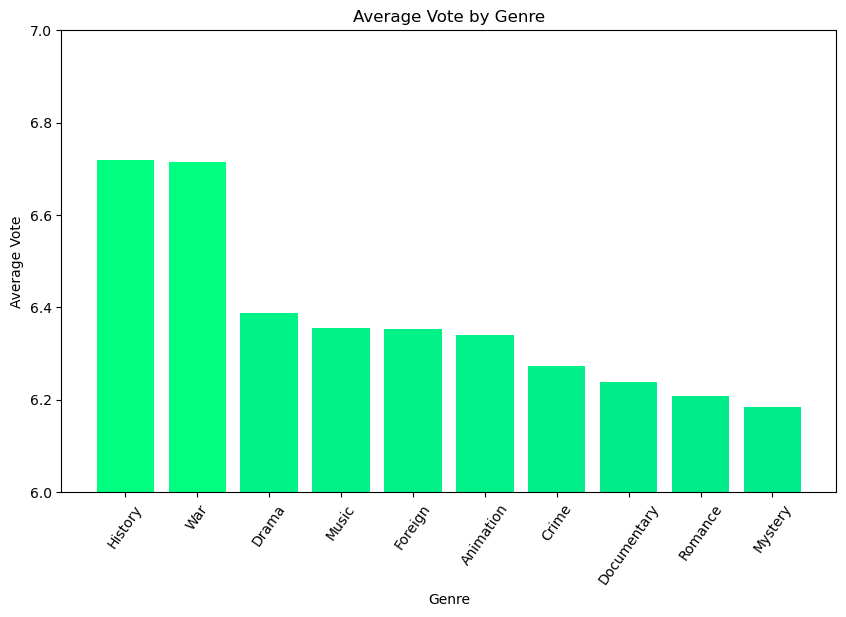

In [242]:
normalized_votes = sorted_vote['vote_average'] / sorted_vote['vote_average'].max()
plt.figure(figsize=(10, 6))
plt.bar(sorted_vote['extracted_genres'], sorted_vote['vote_average'], color=cmap(normalized_votes))
plt.xlabel('Genre')
plt.ylabel('Average Vote')
plt.title('Average Vote by Genre')
plt.xticks(rotation=55)
plt.ylim(6, 7)  # Set the y-axis limits to 6 and 7

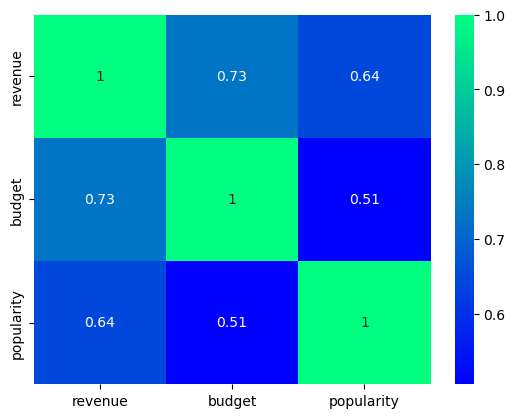

In [70]:
corr_matrix = df[['revenue', 'budget', 'popularity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='winter') 
plt.show()

### Animation

> Let's delve deeper into the animation genre to identify the top-performing movies

**By Revenue**

In [74]:
#checking animated top-performers by revenue
sorted_arev = dfg.loc[dfg['extracted_genres'] == 'Animation'].sort_values(by = 'revenue', ascending=False).head(5)

# where sorted_arev is sorted animated revenue

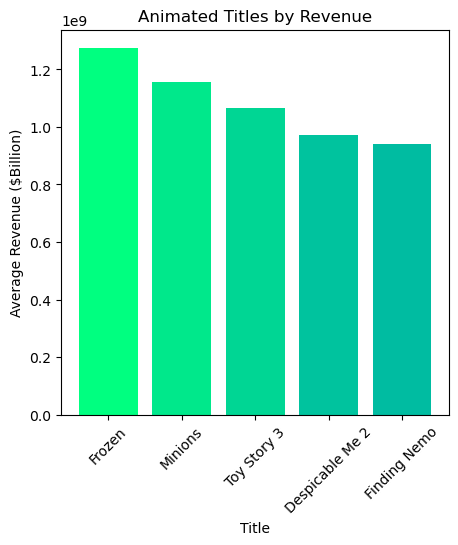

In [206]:
normalized_revenue = sorted_arev['revenue'] / sorted_arev['revenue'].max()
plt.figure(figsize=(5, 5))
plt.bar(sorted_arev['title'], sorted_arev['revenue'], color=cmap(normalized_revenue))
plt.xlabel('Title')
plt.ylabel('Average Revenue ($Billion)')
plt.title('Animated Titles by Revenue')
plt.xticks(rotation=45)
plt.show()

**By Popularity**

In [77]:
#checking animated top-performers by popularity
sorted_apop = dfg.loc[dfg['extracted_genres'] == 'Animation'].sort_values(by = 'popularity', ascending=False).head(5)

# where sorted_apop is sorted animated popularity

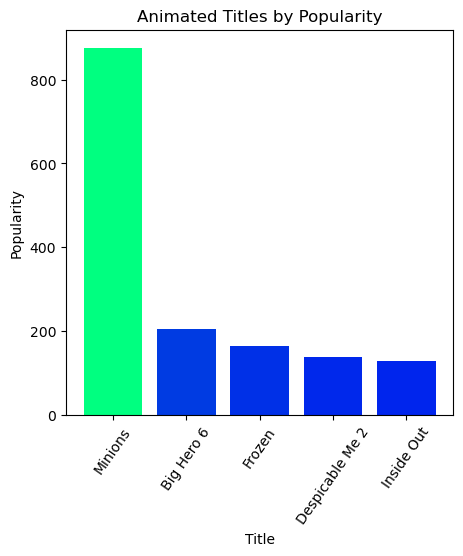

In [208]:
normalized_revenue = sorted_apop['popularity'] / sorted_apop['popularity'].max()
plt.figure(figsize=(5, 5))
plt.bar(sorted_apop['title'], sorted_apop['popularity'], color=cmap(normalized_revenue))
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.title('Animated Titles by Popularity')
plt.xticks(rotation=55)
colour = 'green'
plt.show()

We observe a similar trend as the general analysis: *high popularity correlates with high revenue.*

With Minions, Frozen & Despicable Me 2 still taking a stand and most of these are by Disney & Universal (AGAIN!)

**By Vote**

In [81]:
#checking animated top-performers by votes
sorted_avote = dfg.loc[(dfg['extracted_genres'] == 'Animation') & (dfg['vote_count'] > 500)].sort_values(by = 'vote_average', ascending=False).head(5)

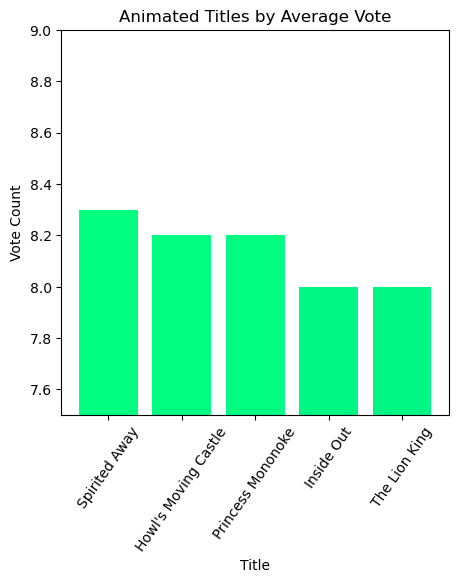

In [210]:
normalized_revenue = sorted_avote['vote_average'] / sorted_avote['vote_average'].max()
plt.figure(figsize=(5, 5))
plt.bar(sorted_avote['title'], sorted_avote['vote_average'], color=cmap(normalized_revenue))
plt.xlabel('Title')
plt.ylabel('Vote Count')
plt.title('Animated Titles by Average Vote')
plt.ylim(7.5, 9)
plt.xticks(rotation=55)
plt.show()

The trend stays true, popularity and revenue have some level of correlation but audience votes strongly differ

A closer examination of the chart, based on average votes, reveals that **Studio Ghibli** dominates the top five, with three of the five films. The remaining two are owned by Disney.

### Correlation between Popularity, Revenue & Votes

In [85]:
correlation = df['revenue'].corr(df['budget'])
print("Correlation between revenue and popularity:", correlation)

Correlation between revenue and popularity: 0.7308059539883781


In [86]:
correlation = df['revenue'].corr(df['popularity'])
print("Correlation between revenue and popularity:", correlation)

Correlation between revenue and popularity: 0.6447002032367566


In [87]:
correlation = df['revenue'].corr(df['vote_average'])
print("Correlation between revenue and votes:", correlation)

Correlation between revenue and votes: 0.1971530682573359


In [88]:
correlation = df['popularity'].corr(df['vote_average'])
print("Correlation between popularity and votes:", correlation)

Correlation between popularity and votes: 0.27399039152116733


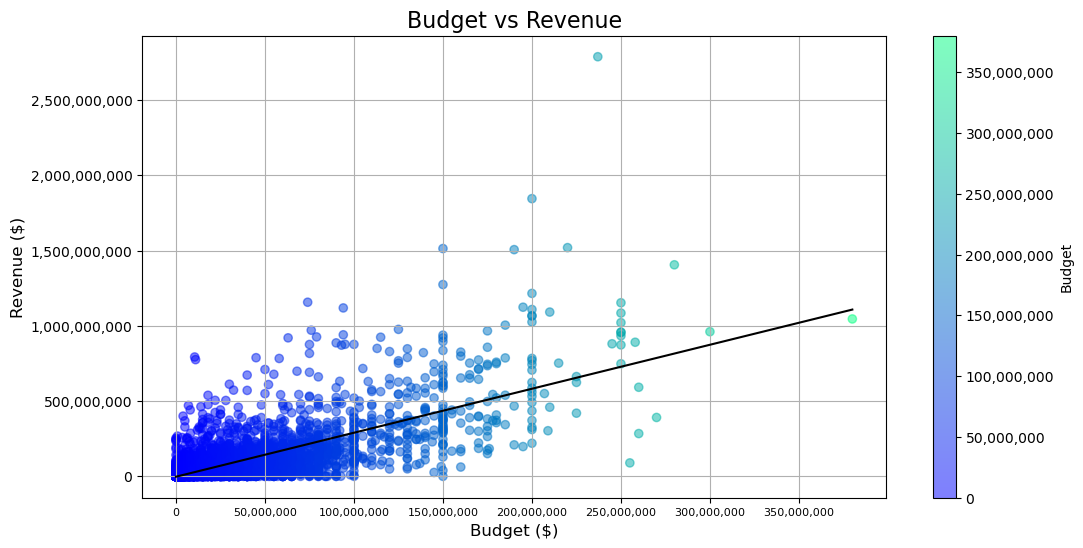

In [212]:
# Custom formatter function to format large numbers 
def format_large_numbers(x, pos):
    return '{:,.0f}'.format(x)

plt.figure(figsize=(12, 6))

# Scatter plot with color map based on budget
plt.scatter(df['budget'], df['revenue'], c=df['budget'], cmap='winter', alpha=0.5)

# Calculate regression line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['budget'], df['revenue'])
x_values = np.linspace(df['budget'].min(), df['budget'].max(), 100) 
y_values = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, y_values, color='black', label='Regression Line')

# Title and labels
plt.title('Budget vs Revenue', fontsize=16)
plt.xlabel('Budget ($)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)

# Apply the custom formatter to both axes
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_large_numbers))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_large_numbers))

# Adjust the font size for the x-axis labels (budget)
plt.xticks(fontsize=8)  # Set the x-axis label font size smaller

# Add color bar
cbar = plt.colorbar(label='Budget')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(format_large_numbers))  # Format the color bar ticks

plt.grid(True)
plt.show()

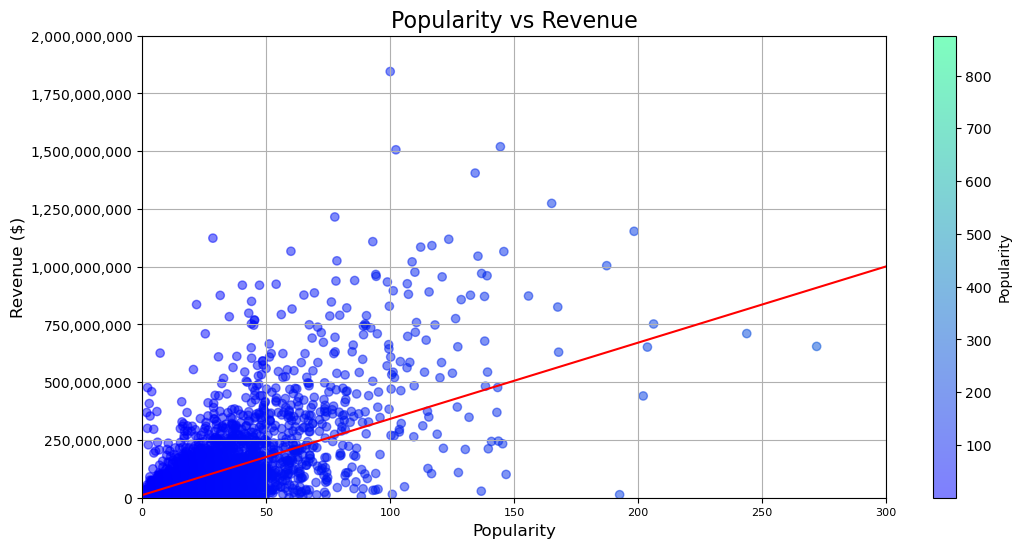

In [214]:
plt.figure(figsize=(12, 6))

# Scatter plot with color map based on budget
plt.scatter(df['popularity'], df['revenue'], c=df['popularity'], cmap='winter', alpha=0.5)

# Calculate regression line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['popularity'], df['revenue'])
x_values = np.linspace(df['popularity'].min(), df['popularity'].max(), 100) 
y_values = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Title and labels
plt.title('Popularity vs Revenue', fontsize=16)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)

# Apply the custom formatter to both axes
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_large_numbers))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_large_numbers))

# Adjust the font size for the x-axis labels (budget)
plt.xticks(fontsize=8)  # Set the x-axis label font size smaller

# Set x-axis and y-axis limits
plt.xlim(0, 300) 
plt.ylim(0, 2000000000)  # Set y-axis limits to 0 and 2

# Add color bar
cbar = plt.colorbar(label='Popularity')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(format_large_numbers))  # Format the color bar ticks

plt.grid(True)
plt.show()

### Genre By Budget

In [92]:
genre_budget = dfg.groupby('extracted_genres')[['budget']].mean().sort_values(by = 'budget', ascending=False).head(10).reset_index()

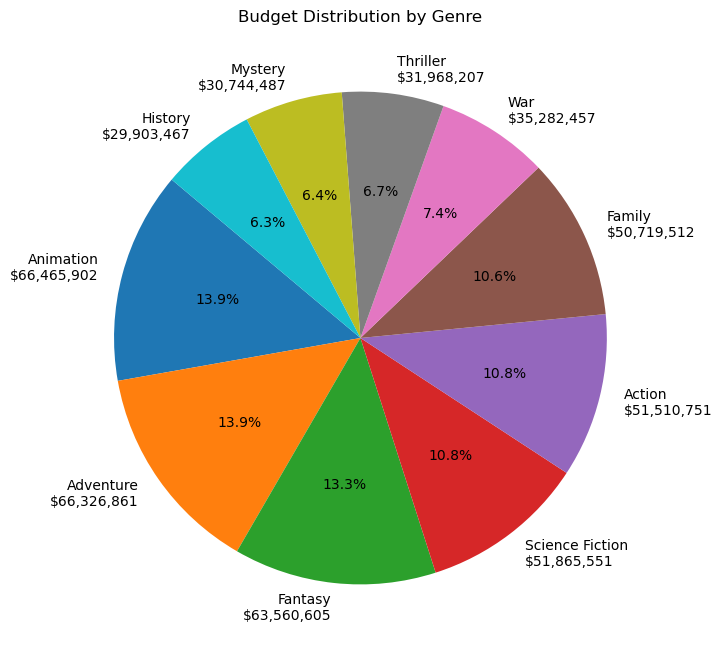

In [220]:
# Plot
plt.figure(figsize=(8, 8))
# Format labels to include both genre and actual budget value
labels = [f"{genre}\n${budget:,.0f}" for genre, budget in zip(genre_budget['extracted_genres'], genre_budget['budget'])]

plt.pie(genre_budget['budget'], labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Budget Distribution by Genre')
plt.show()

### Genre By ROI

In [95]:
def calculate_roi(group):
    return group['revenue'].mean() / group['budget'].mean()

In [96]:
genre_roi = dfg.groupby('extracted_genres').apply(calculate_roi, include_groups=False).sort_values(ascending=False).head(10).reset_index(name='roi')
genre_roi

,extracted_genres,roi
0,Documentary,3.708186
1,Animation,3.395621
2,Family,3.200849
3,Adventure,3.145938
4,Music,3.046022
5,Fantasy,3.042045
6,Horror,2.987854
7,Romance,2.954129
8,Science Fiction,2.939456
9,Comedy,2.816273


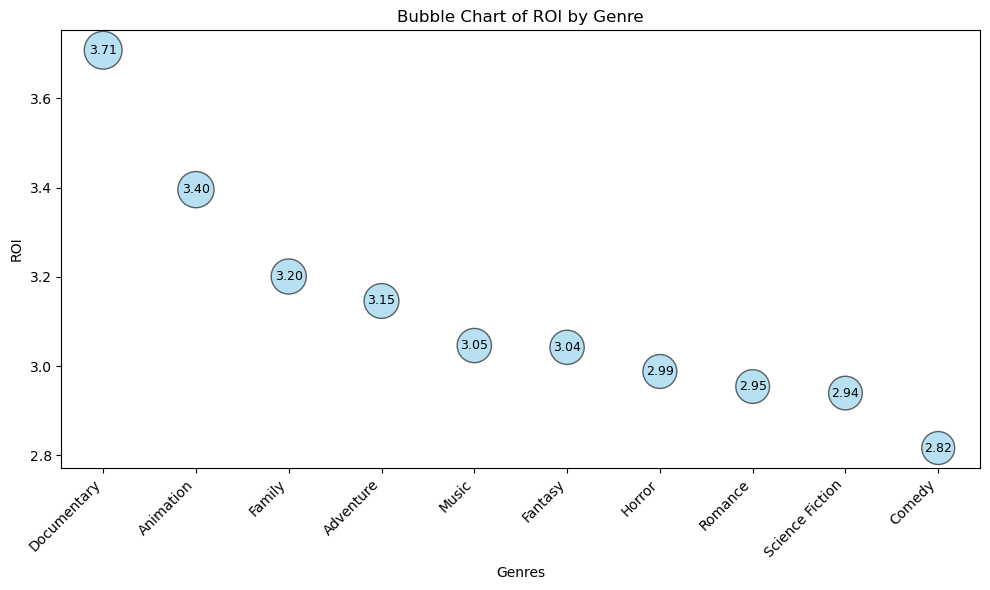

In [97]:
# Define bubble sizes (scaled arbitrarily for visibility)
bubble_sizes = genre_roi['roi'] * 200  # Adjust the multiplier for better visibility

# Create the bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(genre_roi['extracted_genres'], genre_roi['roi'], s=bubble_sizes, alpha=0.6, c='skyblue', edgecolors='black')
plt.xlabel('Genres')
plt.ylabel('ROI')
plt.title('Bubble Chart of ROI by Genre')

# Add annotations for clarity
for i in range(len(genre_roi)):
    plt.text(genre_roi['extracted_genres'][i], genre_roi['roi'][i], f"{genre_roi['roi'][i]:.2f}", 
             fontsize=9, ha='center', va='center')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

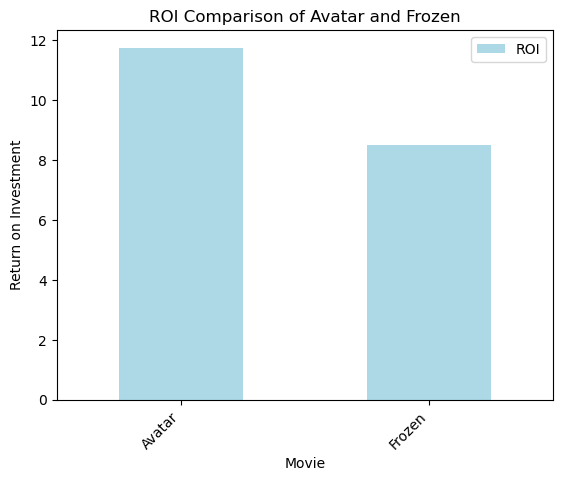

In [222]:
# Calculate ROI for each movie
movie1_roi = dfg[dfg['id'] == 19995]['revenue'].sum() / dfg[dfg['id'] == 19995]['budget'].sum()
movie2_roi = dfg[dfg['id'] == 109445]['revenue'].sum() / dfg[dfg['id'] == 109445]['budget'].sum()

# Create a DataFrame for plotting
roi_data = pd.DataFrame({'Movie': ['Avatar', 'Frozen'], 'ROI': [movie1_roi, movie2_roi]})

# Create the bar chart
roi_data.plot(x='Movie', y='ROI', kind='bar', color = 'lightblue')
plt.xlabel('Movie')
plt.ylabel('Return on Investment')
plt.title('ROI Comparison of Avatar and Frozen')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# From Pixels to Profits: The Business of Animated Film


<p style="text-align:center;">
<img src="https://github.com/Itsrummmy/From_Pixels_to_Profit/blob/main/Images/ptp1.jpg?raw=true"/>


## Introduction

I am particularly interested in exploring which movie genre emerges as the most successful when considering **revenue**, **popularity**, and **vote counts** as key performance indicators. 

This analysis will also investigate the potential correlations between these metrics to understand the drivers of movie success.

## Why these 3 Metrics?

These [key metrics](https://visiblealpha.com/consumer-services/movies-entertainment/movie-entertainment-kpis/), readily accessible within the dataset, are widely employed to evaluate a film's commercial and critical success."

## Let's Look at the Numbers by Genre (Charts)

**BY AVERAGE REVENUE**

<p align="center">
<img src="https://github.com/Itsrummmy/From_Pixels_to_Profit/blob/main/Images/avgrev.jpg?raw=true"/>

**BY POPULARITY**

<p align="center">
<img src="https://github.com/Itsrummmy/From_Pixels_to_Profit/blob/main/Images/avgpopular.jpg?raw=true"/>

**BY AVERAGE VOTE**

<p align="center">
<img src="https://github.com/Itsrummmy/From_Pixels_to_Profit/blob/main/Images/avgvotes.jpg?raw=true"/>

## Zooming In with Tables 🔍

|Number| Revenue | Popularity | Votes |
|:---|---|---|---|
|1|**Animation**|Adventure|History|
|2|Adventure|**Animation**|War|
|3|Fantasy|Science Fiction|Drama|
|4|Family|Fantasy|Music|
|5|Science Fiction|Action|Foreign|
|6|-|-|**Animation**|

<img src="https://images.unsplash.com/photo-1515041219749-89347f83291a?q=80&w=2574&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width="600" height="450" />

**Observation**

Compared to other genres, *animation* demonstrates a clear competitive advantage across key metrics, 

consistently achieving high levels of Revenue, Popularity, and positive audience sentiment.


>

>

## Animation 🏃‍♀💨 🧟‍♀️

Using the same key metrics established, what does it say or show us about the Animation genre

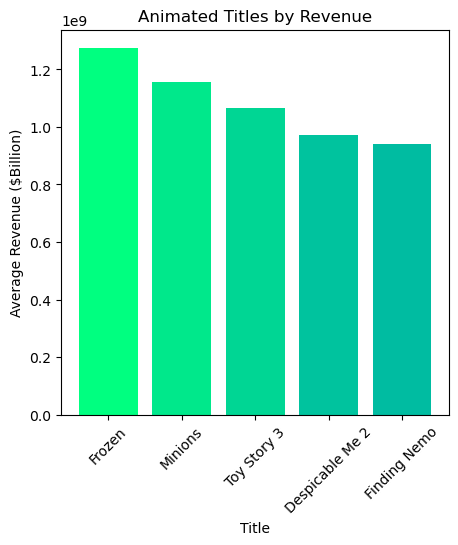

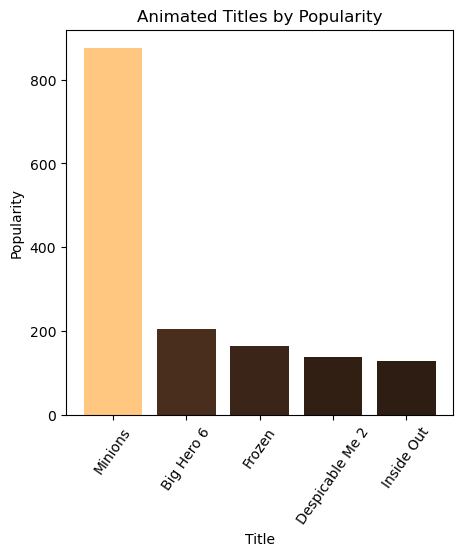

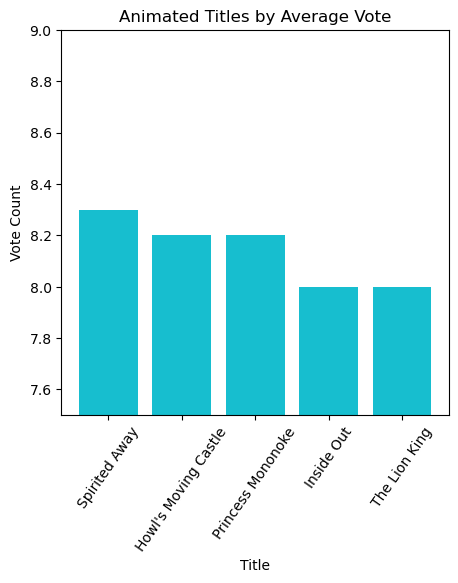

|Number| Revenue | Popularity | Votes |
|:---|---|---|---|
|1|Frozen|Minions|Spirited Away|
|2|Minions|Big Hero 6|Howl's Moving Castle|
|3|Toy Story 3|Frozen|Princess Mononoke|
|4|Despicable Me 2|Despicable Me 2|Inside Out|
|5|Finding Nemo|Inside Out|The Lion King|

>

It is noteworthy that a substantial portion of these films originate from a relatively small group of production companies.

>

|Number| Revenue | Popularity | Votes |
|:---|---|---|---|
|1|Walt Disney Pictures|Universal Pictures|Studio Ghibli|
|2|Universal Pictures|Walt Disney Pictures|Studio Ghibli|
|3|Walt Disney Pictures|Walt Disney Pictures|Studio Ghibli|
|4|Universal Pictures|Universal Pictures|Walt Disney Pictures|
|5|Pixar|Walt Disney Pictures|Walt Disney Pictures|

## What's Animations big secret?

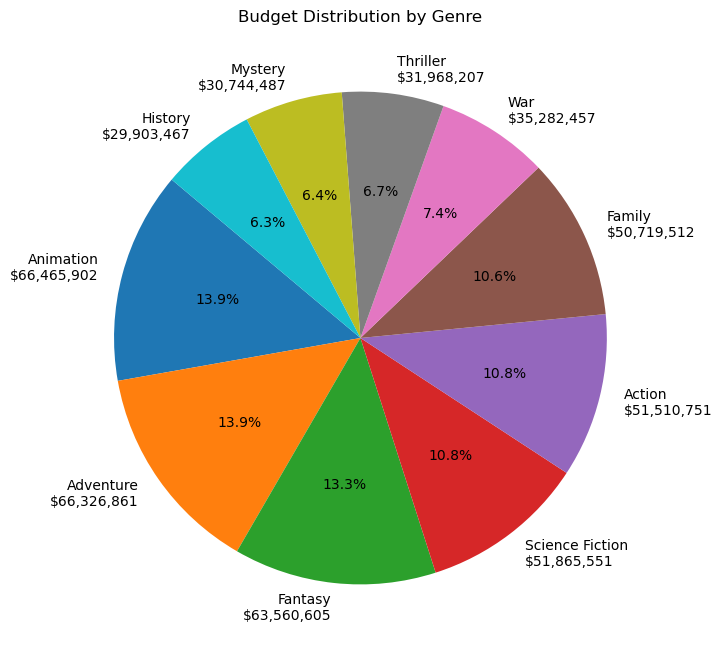

>

>

<u>Return on Investment(ROI) by Genre<u/>

>

>

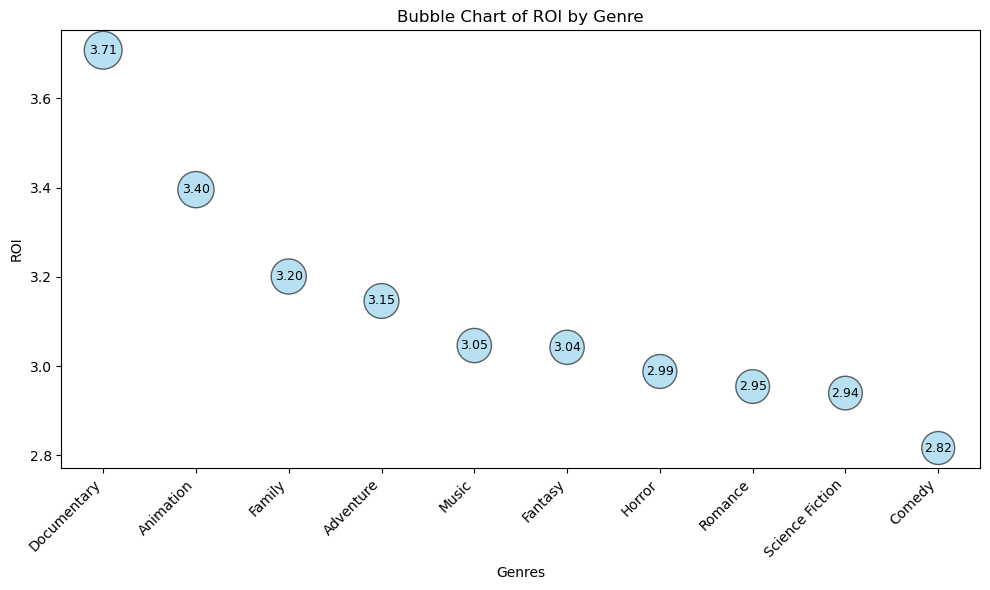

## Animation vs Adventure (ROI)
### Frozen vs Avatar

Lets look at their biggest earners and compare their ROIs

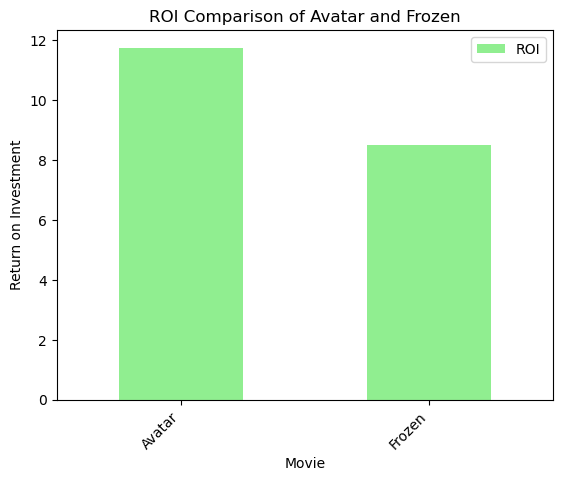

## *Correlation Stats*

General Correlation STATS using the Pearson correlation coefficient

- Correlation between budget and revenue: 0.73 - **good correlation**
- Correlation between revenue and popularity: 0.64 - **good correlation**
- Correlation between revenue and votes: 0.19 - **very weak correlation**
- Correlation between popularity and votes: 0.27 - **weak correlation**


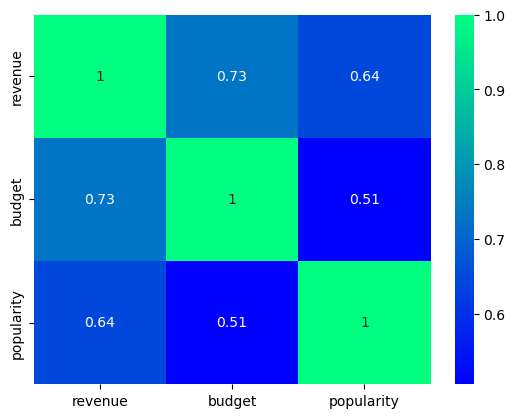

<u>Looking at the Scatterplots for Popularity vs Revenue & Budget vs Revenue<u/>

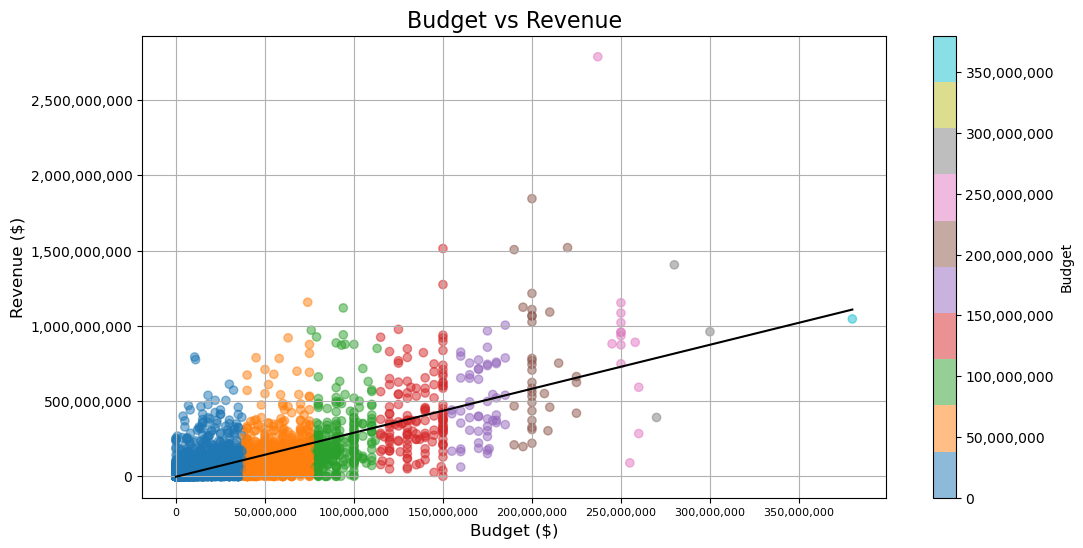

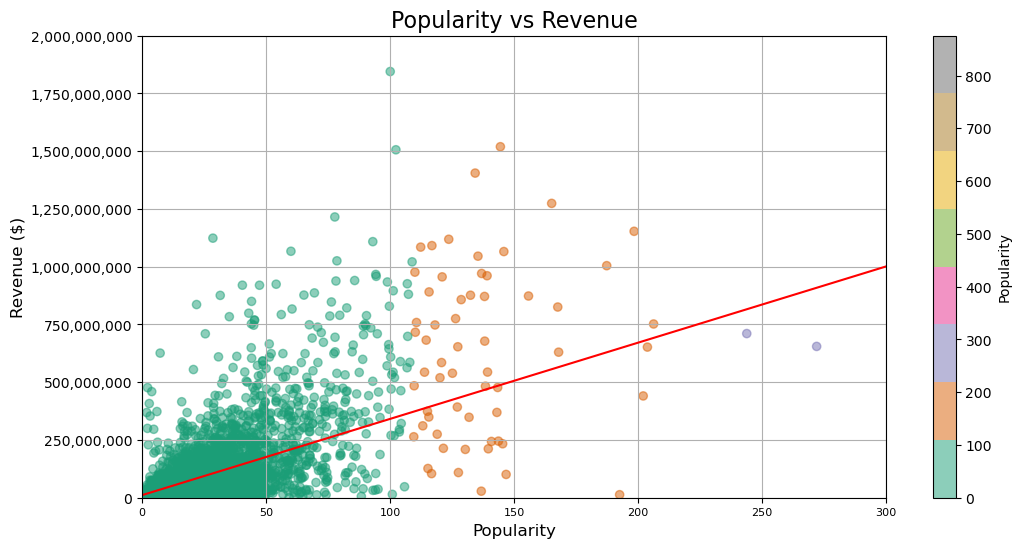

## Conclusions

- **Animation** is the big winner
- There is a *good correlation* between Popularity and Revenue
- and an even stronger one between Budget and Revenue